<a href="https://colab.research.google.com/github/clwilkinson7/Temp/blob/main/Week_8_DL2_Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A first look at a neural network
**Loading the MNIST dataset in Keras**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

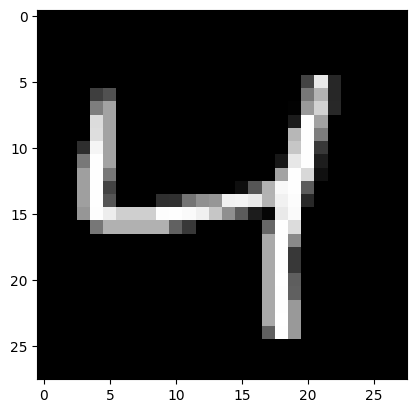

In [ ]:
import matplotlib.pyplot as plt
img = train_images[2]
plt.imshow(img,cmap='gray')

**The network architecture**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    keras.Input(shape=(784,)),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [ ]:
model.compile(optimizer="SGD",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

"Unwrap" a 2D image as a 1-D string of pixels.
The original shape of the image dataset is (60000, 28, 28), meaning there are 60000 images, each with the dimension of 28 by 28.
After reshaping, the new image dataset has the shape of (60000, 28*28) which is (60000, 784). there are now 60000 images, each with the dimension of 1 by 784: a string of 784 pixels.


In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

test_images = test_images.reshape((10000, 28 * 28))

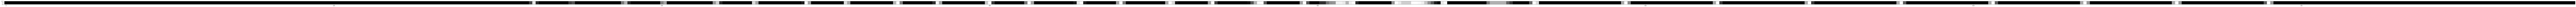

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
img = train_images[2]
img = np.expand_dims(img, axis=0)
plt.figure(figsize = (400,20))
plt.imshow(img,cmap='gray')

In [ ]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6407 - loss: 1.5045
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8689 - loss: 0.5591
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8886 - loss: 0.4337
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8978 - loss: 0.3793
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9031 - loss: 0.3543


**Using the model to make predictions**

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([1.5025357e-04, 3.0919307e-06, 1.2983326e-04, 1.2932291e-03,
       2.7975935e-05, 6.0549217e-05, 1.4843411e-06, 9.9549574e-01,
       9.1408292e-05, 2.7465643e-03], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.99549574

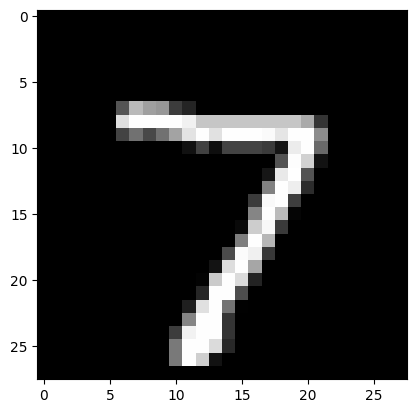

In [ ]:
img2 = test_images[0].reshape(28, 28)
plt.imshow(img2,cmap='gray')

In [ ]:
test_labels[0]

7

**Check 100 predictions**

In [ ]:
imgs = test_images[:100]
#img = (np.expand_dims(img, 0))
predictions = model.predict(imgs)
#predictions

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


**Compare images and prediction results**

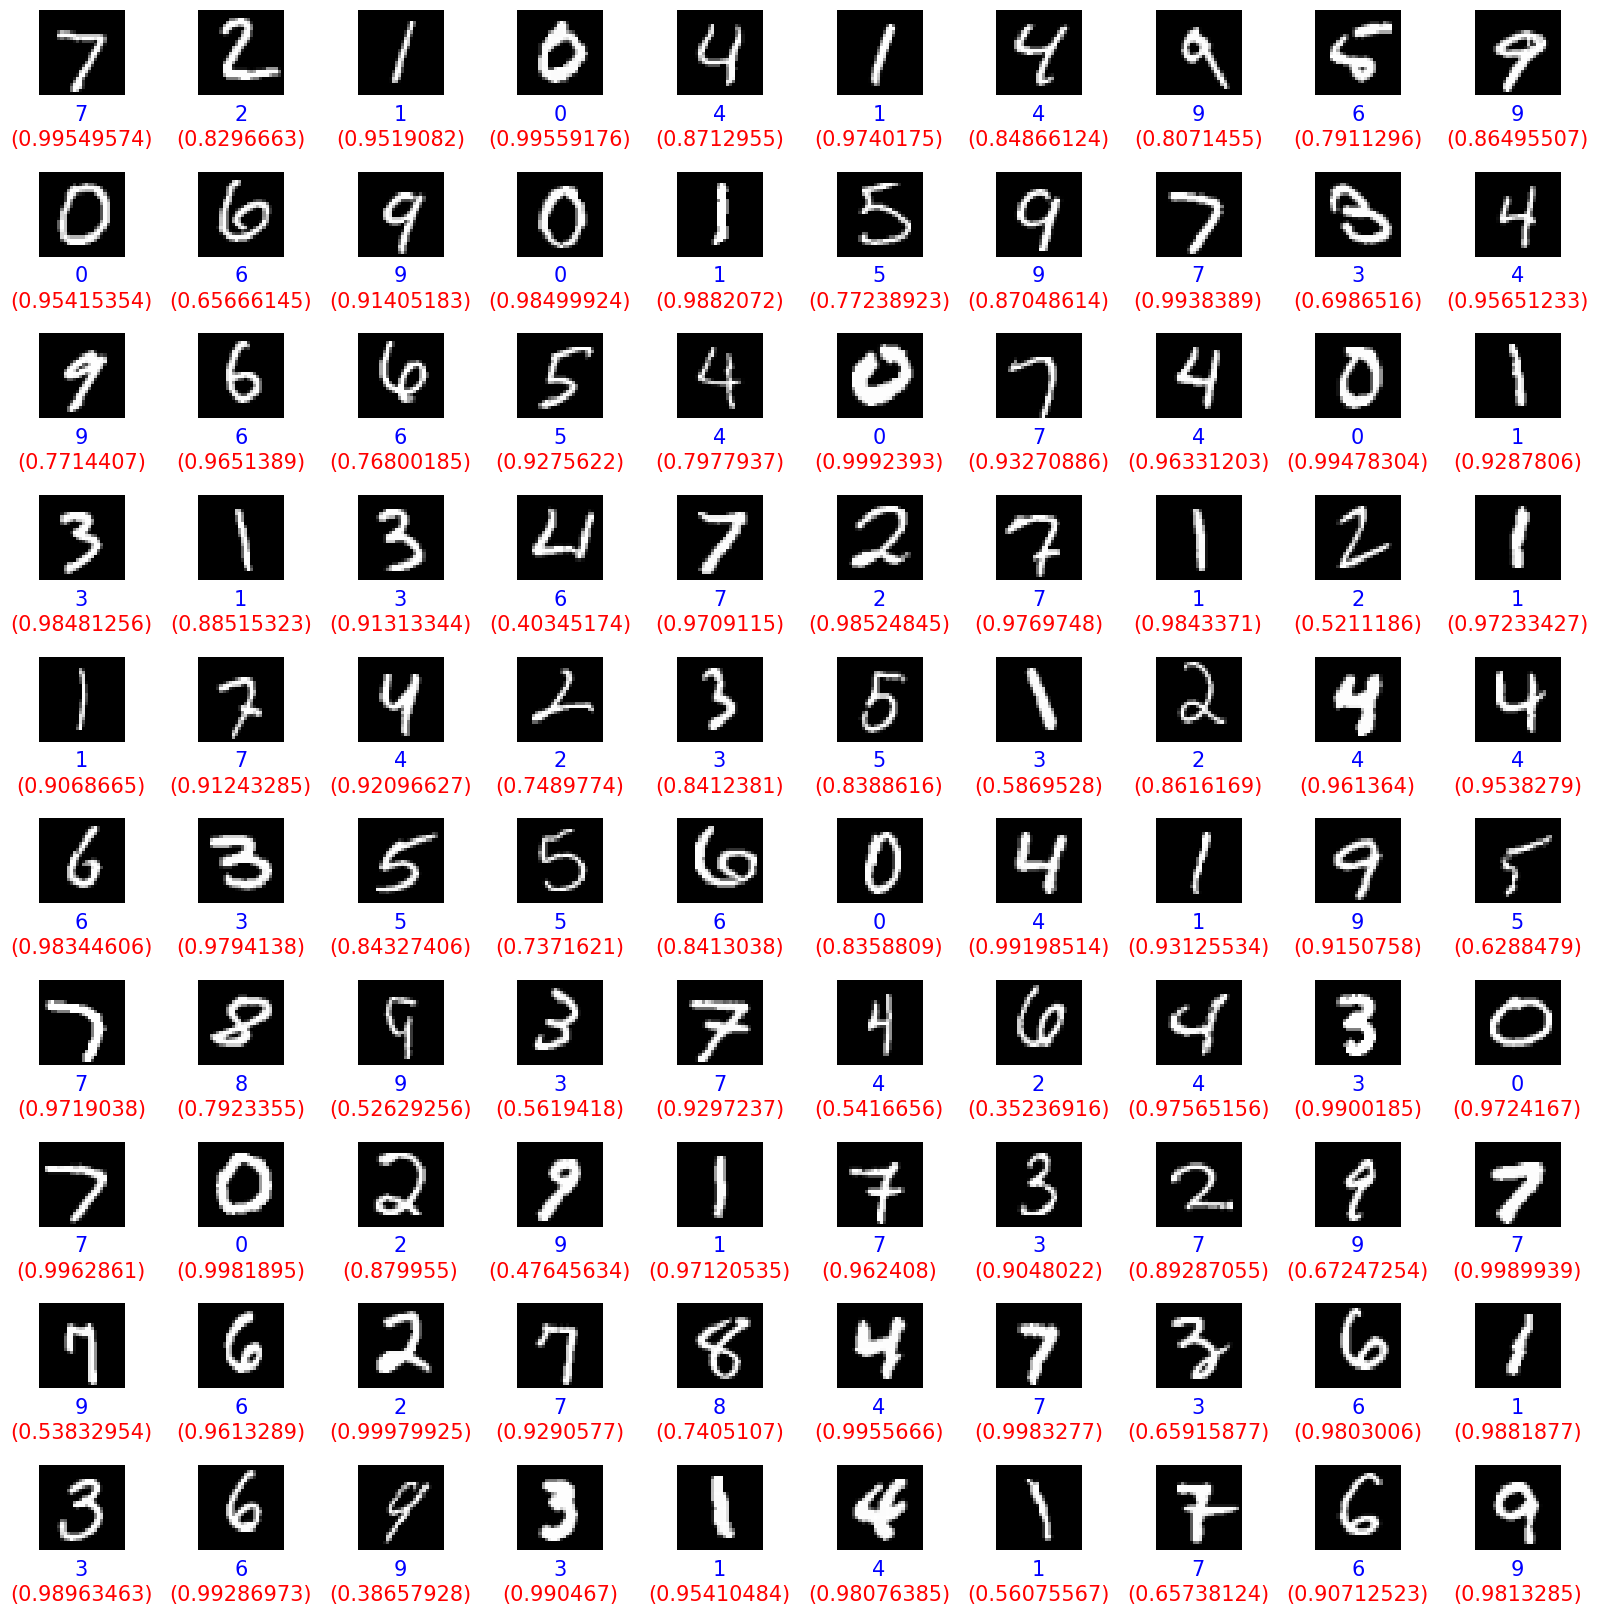

In [ ]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.9, wspace=0.4)
for i in range(100):
    img = imgs[i].reshape(28, 28)
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    ax.text(0.5, -0.3, str(np.argmax(predictions[i])), fontsize=15, color='blue', ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.6, '('+str(predictions[i][np.argmax(predictions[i])])+')', fontsize=15, color='red', ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='gray')
    #ax.imshow(img, cmap='gray_r')

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8964 - loss: 0.3648
test_acc: 0.9106000065803528


Tests:

Number of layers and neurons per layer
- Lowering the "relu" layers didn't seem to do anything
- Increasing the "relu" layer significantly affected the time it took for model.fit() to run and increased accuracy
- Lowering the "softmax" layer caused an error as model.fit() could not take into accounts numbers 6,7,8 and 9
- increasing the "softmax" layer didn't seem to do anything

Loss function
- Using "binary_crossentropy" gave error as model.fit() couldn't run
- Using "categorical_crossentropy" have error as model.fit() couldn't run

Batch size
- Decreasing the batch size meant on each epoch more gradient updates occured per epoch, meaning less epochs are needed.The code runs for longer
- Increasing means less gradient updaates occur per epoch and so more epochs would be needed for a good accuracy.

Epochs
- Increasing the number of epochs meant the weighting could be adjusted more and so there was a higher degree of accuracy. Additionally it mean the code ran for longer
- Lowering the number of epochs decreased the accuracy

Optimiser
- Using "rprop" gave an error
- Using "SGD" gave a weaker result with a lower accuracy